# Projekt: Klasyfikacja wina NN 70% Acc + ML

![](https://winery.ph/cdn/shop/articles/WPH_Blog_Hero_Graphics_1_1500x901.jpg?v=1620291667)


# DANE

Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). *Wine Quality*. UCI Machine Learning Repository.  
DOI: [https://doi.org/10.24432/C56S3T](https://doi.org/10.24432/C56S3T)

---



# Wczytanie danych z UCI (wersja czerwonego wina)


# Importy i wczytanie danych

Instalujemy narzędzie do automatycznego strojenia hiperparametrów sieci neuronowych.

-q oznacza „quiet”, czyli cicha instalacja bez nadmiaru komunikatów.

In [ ]:
!pip install -q keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.9 MB/s eta 0:00:00


- numpy — podstawowa biblioteka do obliczeń numerycznych w Pythonie, umożliwiająca efektywne operacje na dużych tablicach i macierzach, niezbędna przy przetwarzaniu danych wejściowych do modeli.

- pandas — narzędzie do manipulacji i analizy danych tabelarycznych (DataFrame), pozwalające na wygodne wczytywanie, eksplorację oraz wstępne przetwarzanie zbioru danych.

- matplotlib.pyplot — podstawowa biblioteka do tworzenia wykresów i wizualizacji danych, wykorzystywana do prezentacji rozkładów cech oraz wyników analizy eksploracyjnej.

- seaborn — rozszerzenie matplotlib, oferujące bardziej zaawansowane i estetyczne wizualizacje statystyczne, ułatwiające interpretację zależności między zmiennymi.

- tensorflow oraz keras — framework do głębokiego uczenia maszynowego; keras to wysokopoziomowe API TensorFlow umożliwiające łatwe definiowanie i trenowanie modeli sieci neuronowych.

- tensorflow.keras.layers — moduł zawierający gotowe warstwy sieci neuronowych (np. Dense, Dropout), służące do konstrukcji architektury modelu.

- keras_tuner — biblioteka wspomagająca automatyczne strojenie hiperparametrów modeli Keras, co pozwala na optymalizację struktury sieci i parametrów treningu.

- sklearn.model_selection.train_test_split — funkcja służąca do podziału danych na zbiory treningowe, walidacyjne i testowe, z zachowaniem proporcji klas (stratyfikacja).

- sklearn.preprocessing.StandardScaler — narzędzie do standaryzacji cech, skalujące zmienne do rozkładu o średniej 0 i odchyleniu standardowym 1, co poprawia efektywność uczenia modelu.

- sklearn.preprocessing.LabelEncoder — klasa umożliwiająca kodowanie etykiet klas (np. tekstowych) na wartości liczbowe, konieczne do pracy algorytmów klasyfikacyjnych.

- sklearn.metrics.confusion_matrix — funkcja generująca macierz pomyłek, która pozwala ocenić jakość klasyfikacji poprzez analizę poprawnych i błędnych predykcji.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics    import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

### Podstawowe informacje

Zbiór danych pochodzi z publicznego repozytorium UCI i dotyczy jakości czerwonego wina.
Składa się z 1599 próbek i 12 zmiennych:

  - 11 cech fizykochemicznych opisujących właściwości wina, takich jak kwasowość stała i lotna, poziom cukrów resztkowych, zawartość chloru, pH, siarczanów, poziom alkoholu oraz inne parametry chemiczne.

  - Zmienna docelowa quality, będąca oceną jakości wina, wyrażoną na skali liczbowej od 3 do 8, stanowiąca etykietę do zadania klasyfikacji.

Celem analizy jest zbudowanie modelu predykcyjnego, który na podstawie cech chemicznych będzie w stanie przewidzieć jakość wina.

In [ ]:
# Wczytanie danych z repozytorium UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

# Podstawowa analiza struktury danych
print("Informacje o danych:")
print(df.info())
print("\n Statystyki opisowe:")
print(df.describe())
print("\n Typy danych:")
print(df.dtypes)

# Sprawdzenie braków danych
print("\n Braki danych (powinno być 0):")
print(df.isnull().sum())

# Liczebność klas (target - jakość wina)
print("\n Liczebność klas jakości wina:")
print(df['quality'].value_counts().sort_index())


Informacje o danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

 Statystyki opisowe:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count  

Kod sprawdza, czy w zbiorze danych występują cechy kategoryczne (czyli zmienne o typie tekstowym, object).

  - Jeśli takie cechy istnieją, wypisuje ich nazwy, co sugeruje konieczność zakodowania ich na format liczbowy (encoding), aby mogły być wykorzystane w modelach uczenia maszynowego.

  - Jeśli cech kategorycznych nie ma, informuje, że encoding nie jest potrzebny.

In [ ]:
#Sprawdzenie cech kategorycznych
categorical = df.select_dtypes(include=['object'])
if categorical.shape[1] > 0:
    print("Cechy kategoryczne do zakodowania:")
    print(categorical.columns)
else:
    print("Brak cech kategorycznych – encoding niepotrzebny.")


Brak cech kategorycznych – encoding niepotrzebny.


W tej części kodu wykonywana jest standaryzacja cech liczbowych — czyli skalowanie danych tak, aby każda zmienna miała średnią 0 i odchylenie standardowe 1.

  - Najpierw z oryginalnego DataFrame df usuwana jest kolumna docelowa quality, pozostawiając tylko cechy wejściowe (features).

  - Następnie obiekt StandardScaler ze scikit-learn dopasowuje się do tych cech i przekształca je do standaryzowanej postaci.

  - Wynikowa, przeskalowana macierz jest konwertowana z powrotem na DataFrame df_scaled z zachowaniem nazw kolumn.

  -Na końcu do tego standaryzowanego zbioru dodawana jest kolumna docelowa quality z oryginalnych danych, która pozostaje bez zmian (nie skalujemy zmiennej celu).

Standaryzacja poprawia efektywność uczenia modeli, ponieważ cechy mają zbliżone skale i wpływ na proces optymalizacji.

In [ ]:
# Standaryzacja cech liczbowych
features = df.drop('quality', axis=1)

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

df_scaled = pd.DataFrame(features_scaled, columns=features.columns)
df_scaled['quality'] = df['quality']


# Korelacja cech



- df.corr() oblicza współczynniki korelacji Pearsona między parami cech — wartości bliskie 1 lub -1 oznaczają silną zależność (odpowiednio dodatnią lub ujemną), natomiast wartości bliskie 0 wskazują na brak korelacji.

- sns.heatmap rysuje mapę cieplną, gdzie kolor i intensywność pokazują siłę korelacji, a annot=True powoduje wyświetlenie wartości liczbowych na wykresie z formatowaniem do dwóch miejsc po przecinku (fmt=".2f").

- Kolorystyka coolwarm podkreśla dodatnie korelacje ciepłymi (czerwonymi) i ujemne zimnymi (niebieskimi) barwami.

Taki wykres pomaga zrozumieć zależności między cechami oraz zidentyfikować ewentualną redundancję lub silne powiązania, co jest istotne przy dalszym przetwarzaniu danych i budowie modeli.

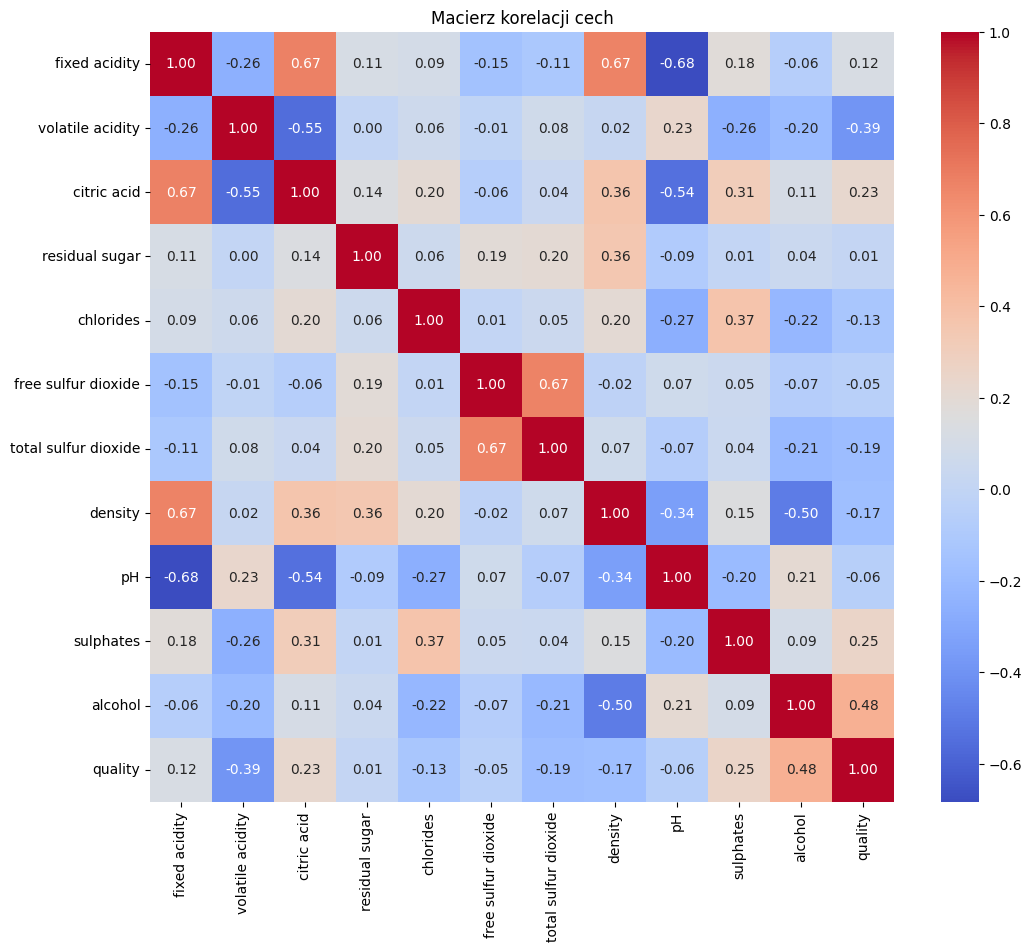

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Macierz korelacji cech")
plt.show()

Ta część kodu tworzy boxploty dla każdej cechy w zbiorze danych, co pozwala na wizualną identyfikację wartości odstających (outlierów).

  - Ustawiamy rozmiar figury (figsize=(15, 12)), aby pomieścić wszystkie wykresy.

  - Pętla for iteruje przez wszystkie kolumny cech, rysując osobny wykres pudełkowy (boxplot) dla każdej z nich w siatce 4 na 3 podwykresów.

  - Każdy boxplot pokazuje rozkład wartości cechy, medianę, kwartyle oraz potencjalne wartości odstające.

  - Dodajemy tytuł do każdego wykresu z nazwą cechy oraz wspólny tytuł całej figury.

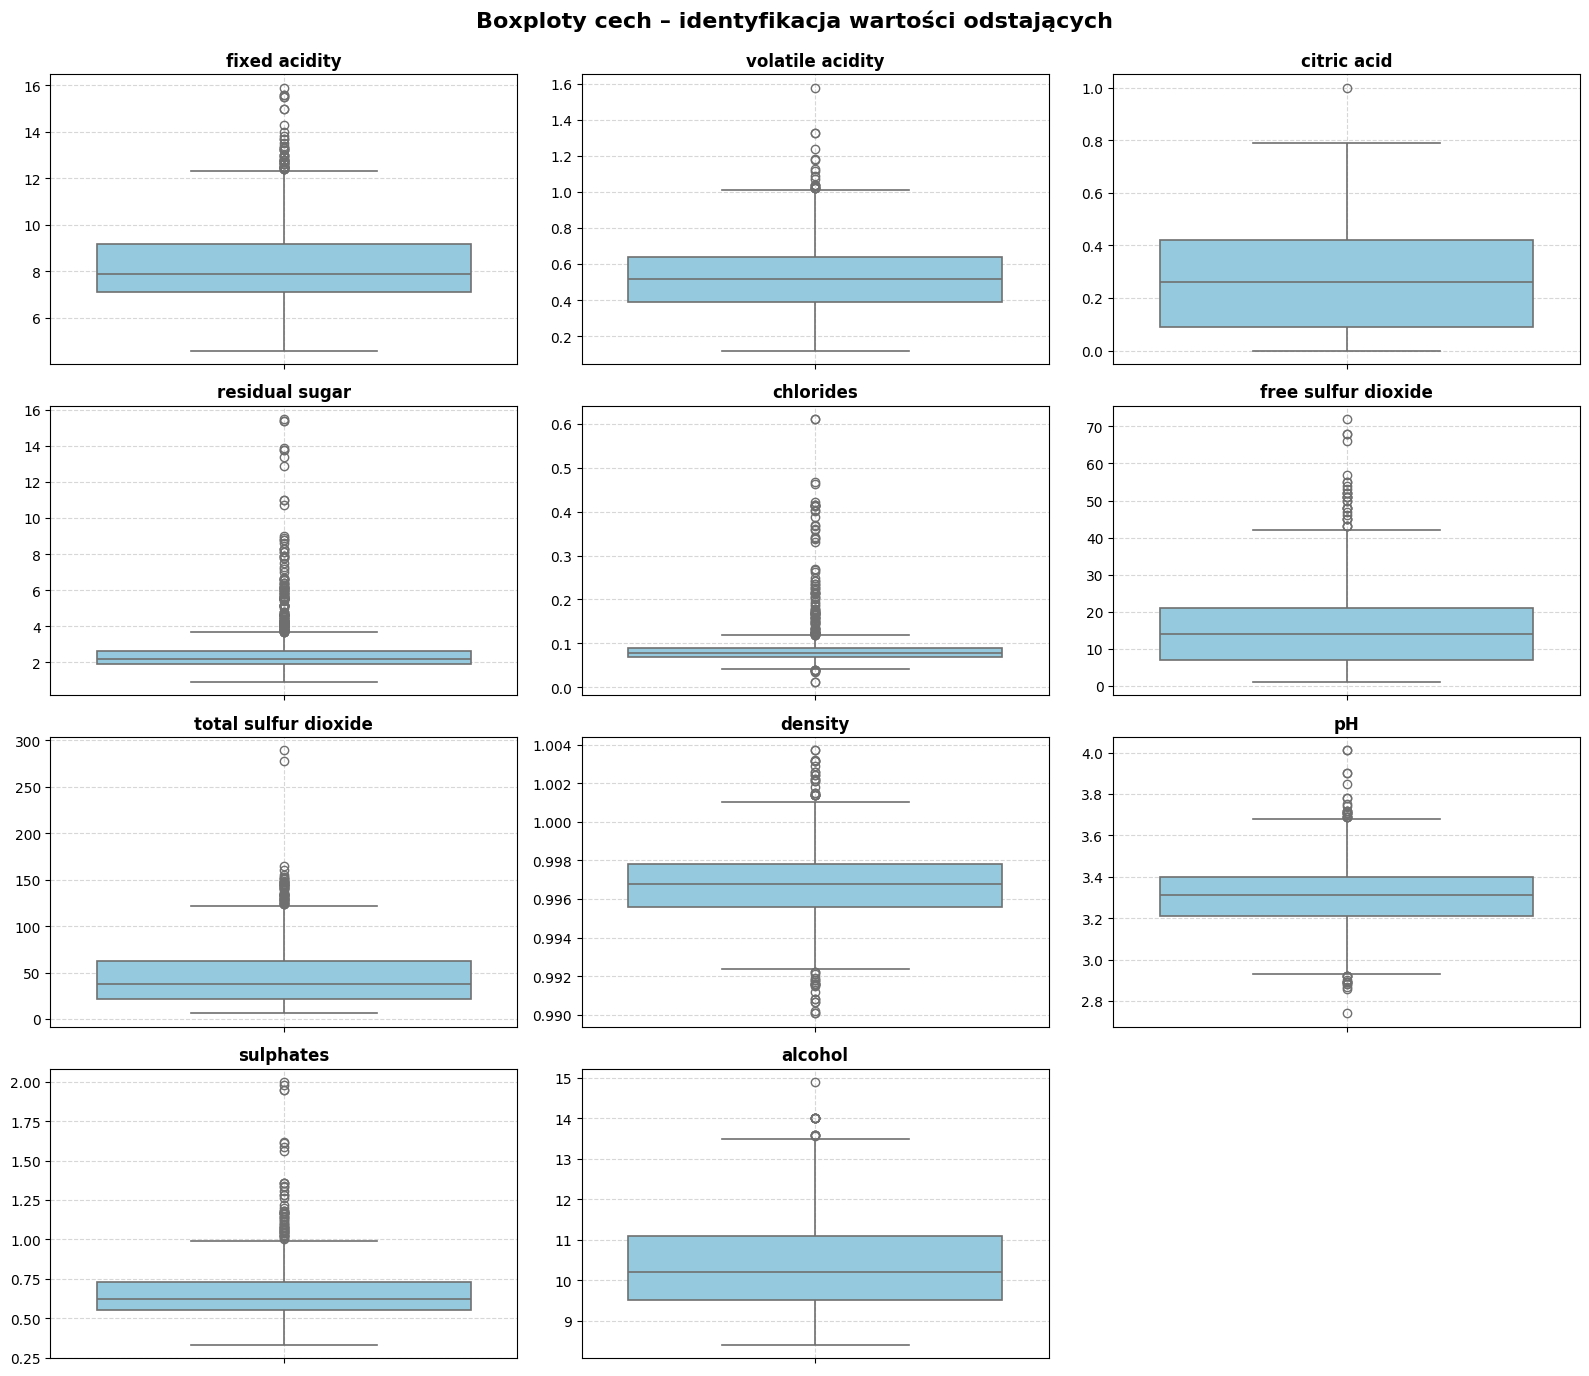

In [ ]:
plt.figure(figsize=(16, 14))
for idx, col in enumerate(features.columns):
    plt.subplot(4, 3, idx + 1)
    sns.boxplot(data=df, y=col, color='skyblue', linewidth=1.2)
    plt.title(col, fontsize=12, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('')
    plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.suptitle("Boxploty cech – identyfikacja wartości odstających", fontsize=16, fontweight='bold')
plt.show()


Ten fragment definiuje funkcję oraz wykorzystuje ją do usuwania wartości odstających (outlierów) z danych na podstawie reguły IQR (Interquartile Range).

  - Funkcja remove_outliers_iqr przyjmuje dwa argumenty:

    - df — DataFrame z danymi,

    - columns — lista nazw kolumn, w których będą wyszukiwane outliery.

  -Dla każdej kolumny w podanym zbiorze funkcja oblicza:

    - pierwszy kwartyl (Q1, 25. percentyl),

    - trzeci kwartyl (Q3, 75. percentyl),

    - rozstęp międzykwartylowy (IQR = Q3 - Q1).

  -Na podstawie IQR definiuje dolną i górną granicę akceptowalnych wartości jako:

    - dolna granica = Q1 − 1.5 × IQR,

    - górna granica = Q3 + 1.5 × IQR.

  -Następnie odfiltrowuje obserwacje, które mieszczą się w tych granicach, usuwając tym samym potencjalne wartości odstające dla każdej cechy.

  -Funkcja zwraca oczyszczony DataFrame bez outlierów.

  W dalszej części:

Funkcja jest wywoływana na oryginalnym zbiorze df dla wszystkich cech liczbowych (features.columns).

  - Wynikowy zbiór df_no_outliers zawiera tylko obserwacje bez wartości odstających.

  - Na koniec wyświetlane są rozmiary zbioru przed i po usunięciu outlierów, co pokazuje, ile próbek zostało odrzuconych.

In [ ]:
#Funkcja czyszcząca zbiór z outlierów według reguły IQR
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

#Usuwanie outlierów z oryginalnego DataFrame
df_no_outliers = remove_outliers_iqr(df, features.columns)

print(f"Rozmiar danych przed: {df.shape}")
print(f"Rozmiar po usunięciu outlierów: {df_no_outliers.shape}")


Rozmiar danych przed: (1599, 12)
Rozmiar po usunięciu outlierów: (1135, 12)


W tym kroku przygotowujemy dane po usunięciu wartości odstających:

  - Oddzielenie cech i zmiennej docelowej:

    - Z DataFrame df_no_outliers usuwamy kolumnę quality, pozostawiając tylko cechy wejściowe w features_clean.

    - Zmienna docelowa quality jest zapisywana osobno w target_clean.

  - Standaryzacja cech:

    - Tworzymy obiekt StandardScaler i dopasowujemy go do cech features_clean, jednocześnie je przekształcając — tak aby każda cecha miała średnią 0 i odchylenie standardowe 1.

    - Standaryzacja jest ważna, by cechy miały podobną skalę, co poprawia działanie wielu modeli.

  - Tworzenie nowego DataFrame:

    - Przeskalowane cechy są konwertowane z powrotem do DataFrame df_scaled_clean z zachowaniem nazw kolumn.

    - Do tego DataFrame dołączana jest oryginalna (niezmieniona) kolumna quality jako zmienna docelowa.



In [ ]:
# Oddzielenie cech i targetu po czyszczeniu
features_clean = df_no_outliers.drop('quality', axis=1)
target_clean = df_no_outliers['quality']

#Standaryzacja
scaler = StandardScaler()
features_scaled_clean = scaler.fit_transform(features_clean)

#Sklejamy z powrotem z targetem
df_scaled_clean = pd.DataFrame(features_scaled_clean, columns=features_clean.columns)
df_scaled_clean['quality'] = target_clean


Ten fragment kodu tworzy histogramy dla wszystkich cech liczbowych w zbiorze danych (poza zmienną docelową quality), co pozwala zobaczyć rozkład wartości każdej cechy.

  - df.drop('quality', axis=1) — usuwamy kolumnę quality, aby nie tworzyć histogramu dla zmiennej docelowej.

  -.hist() — metoda pandas do rysowania histogramów dla każdej kolumny.

  -Parametry:

    - bins=15 — liczba przedziałów na histogramie,

    - figsize=(15, 10) — rozmiar całej figury,

    - layout=(4, 3) — układ wykresów w siatce 4 wierszy i 3 kolumn,

    - color='skyblue' i edgecolor='black' — kolory słupków i obramowania.

  -plt.suptitle() — dodaje ogólny tytuł wykresów,

  -plt.tight_layout() — automatycznie dopasowuje rozmieszczenie wykresów,

  -plt.show() — wyświetla wykresy.

<ipython-input-10-cebefb407d0a>:15: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


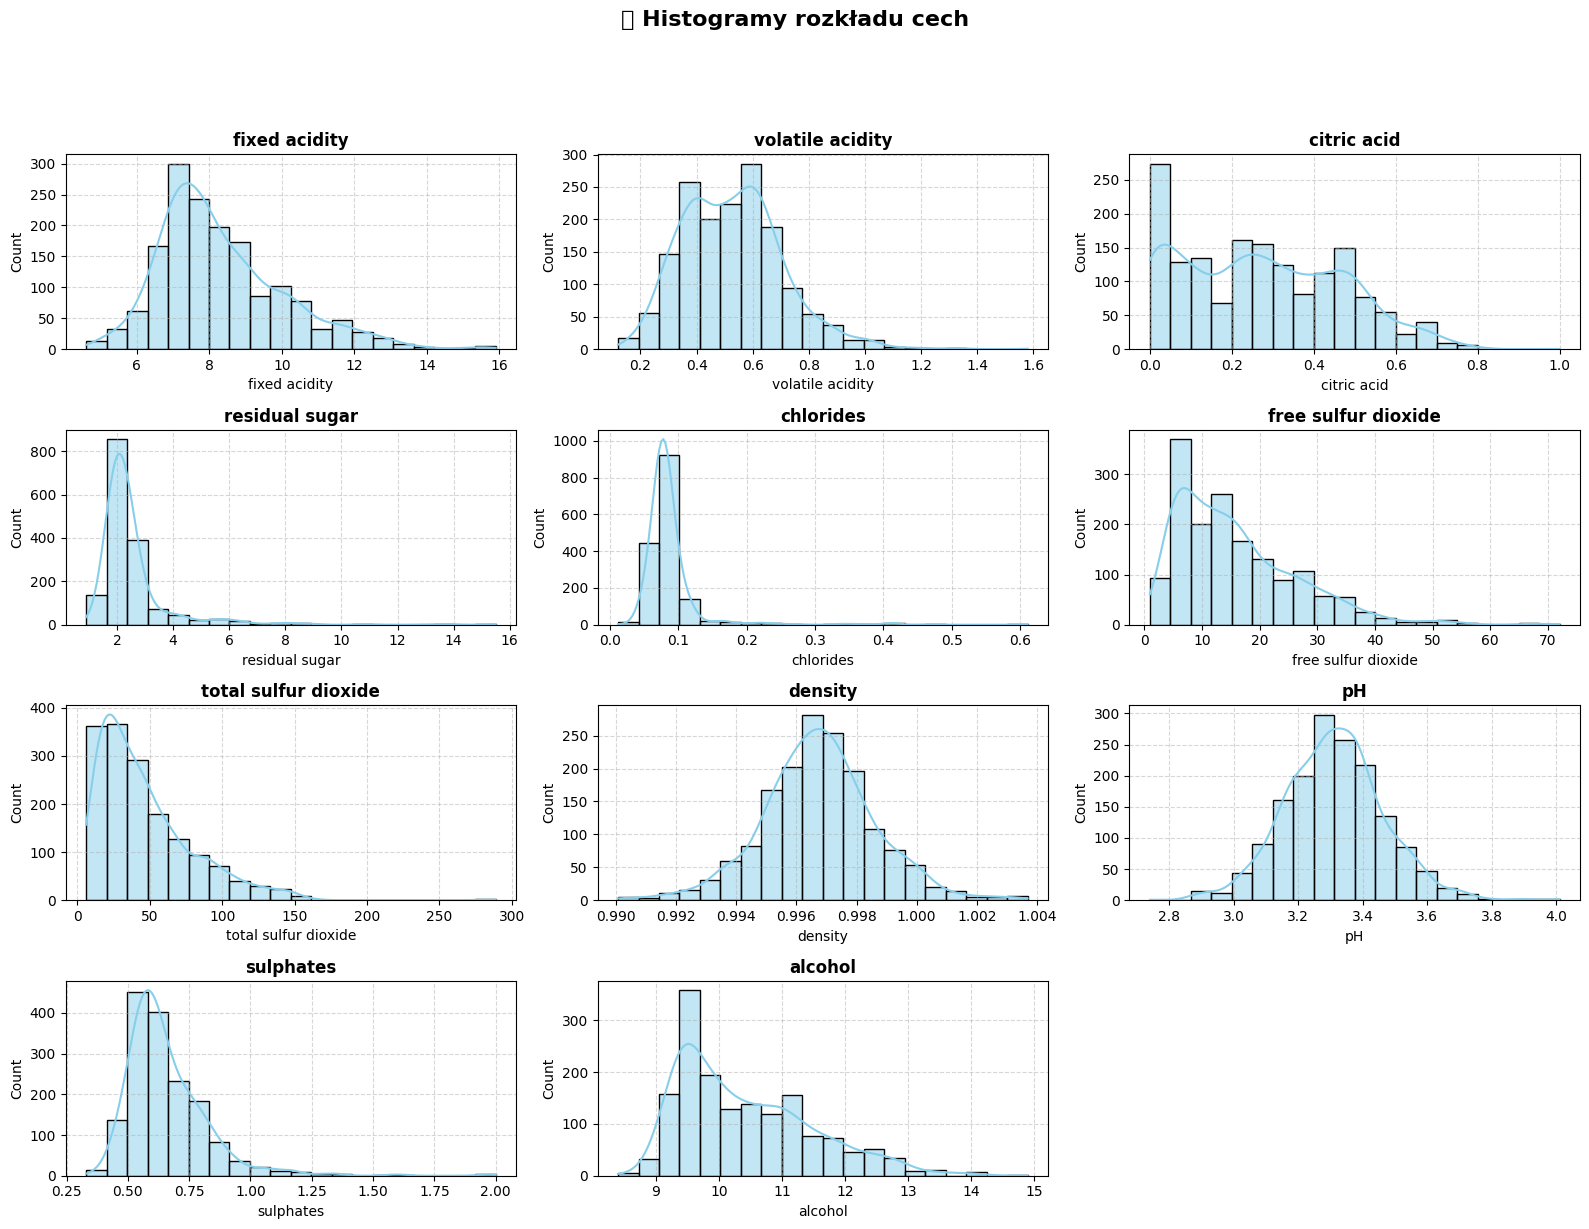

In [ ]:
#Histogramy rozkładu cech
fig, axes = plt.subplots(4, 3, figsize=(16, 12))
axes = axes.flatten()

for idx, col in enumerate(df.drop('quality', axis=1).columns):
    sns.histplot(df[col], bins=20, color='skyblue', edgecolor='black', ax=axes[idx], kde=True)
    axes[idx].set_title(col, fontsize=12, fontweight='bold')
    axes[idx].grid(True, linestyle='--', alpha=0.5)

# Ukrywamy ewentualne puste wykresy, gdy kolumn jest mniej niż 12
for ax in axes[len(df.columns)-1:]:
    ax.axis('off')

plt.suptitle("📊 Histogramy rozkładu cech", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Ten fragment wizualizuje liczebność próbek dla każdej klasy jakości wina (zmienna docelowa quality).

  - sns.countplot() tworzy wykres słupkowy pokazujący, ile jest próbek dla każdej wartości quality.

  - palette='viridis' — zastosowano estetyczną paletę kolorów.

  - plt.title() — dodaje tytuł wykresu,

  - plt.show() — wyświetla wykres.

Wykres ten pomaga zrozumieć rozkład klas, co jest ważne np. do oceny czy dane są zbalansowane.

<ipython-input-11-3b507f7d39e4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')
<ipython-input-11-3b507f7d39e4>:9: UserWarning: Glyph 127991 (\N{LABEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127991 (\N{LABEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


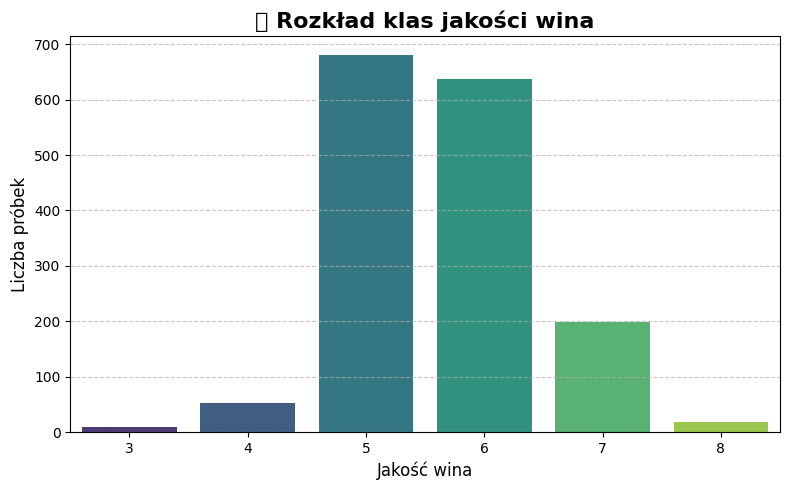

In [ ]:
#Rozkład jakości wina (zmienna docelowa)
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df, palette='viridis')

plt.title("🏷️ Rozkład klas jakości wina", fontsize=16, fontweight='bold')
plt.xlabel("Jakość wina", fontsize=12)
plt.ylabel("Liczba próbek", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Ten fragment tworzy zestaw wykresów boxplotów, które pokazują rozkład poszczególnych cech w podziale na klasy jakości wina (quality).

  - Pętla iteruje po wszystkich cechach (bez quality).

  - Dla każdej cechy rysowany jest sns.boxplot z x='quality' (klasy jako kategorie na osi X) i y=col (wartości cechy na osi Y).

  - Dzięki temu można łatwo zobaczyć, jak różnią się rozkłady cech w różnych klasach jakości (np. mediana, rozstęp międzykwartylowy, obecność outlierów).

  - plt.tight_layout() i plt.suptitle() poprawiają układ i dodają wspólny tytuł.

<ipython-input-12-229d3edcaf3c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, palette='Set3', ax=axes[idx])
<ipython-input-12-229d3edcaf3c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, palette='Set3', ax=axes[idx])
<ipython-input-12-229d3edcaf3c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, palette='Set3', ax=axes[idx])
<ipython-input-12-229d3edcaf3c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed

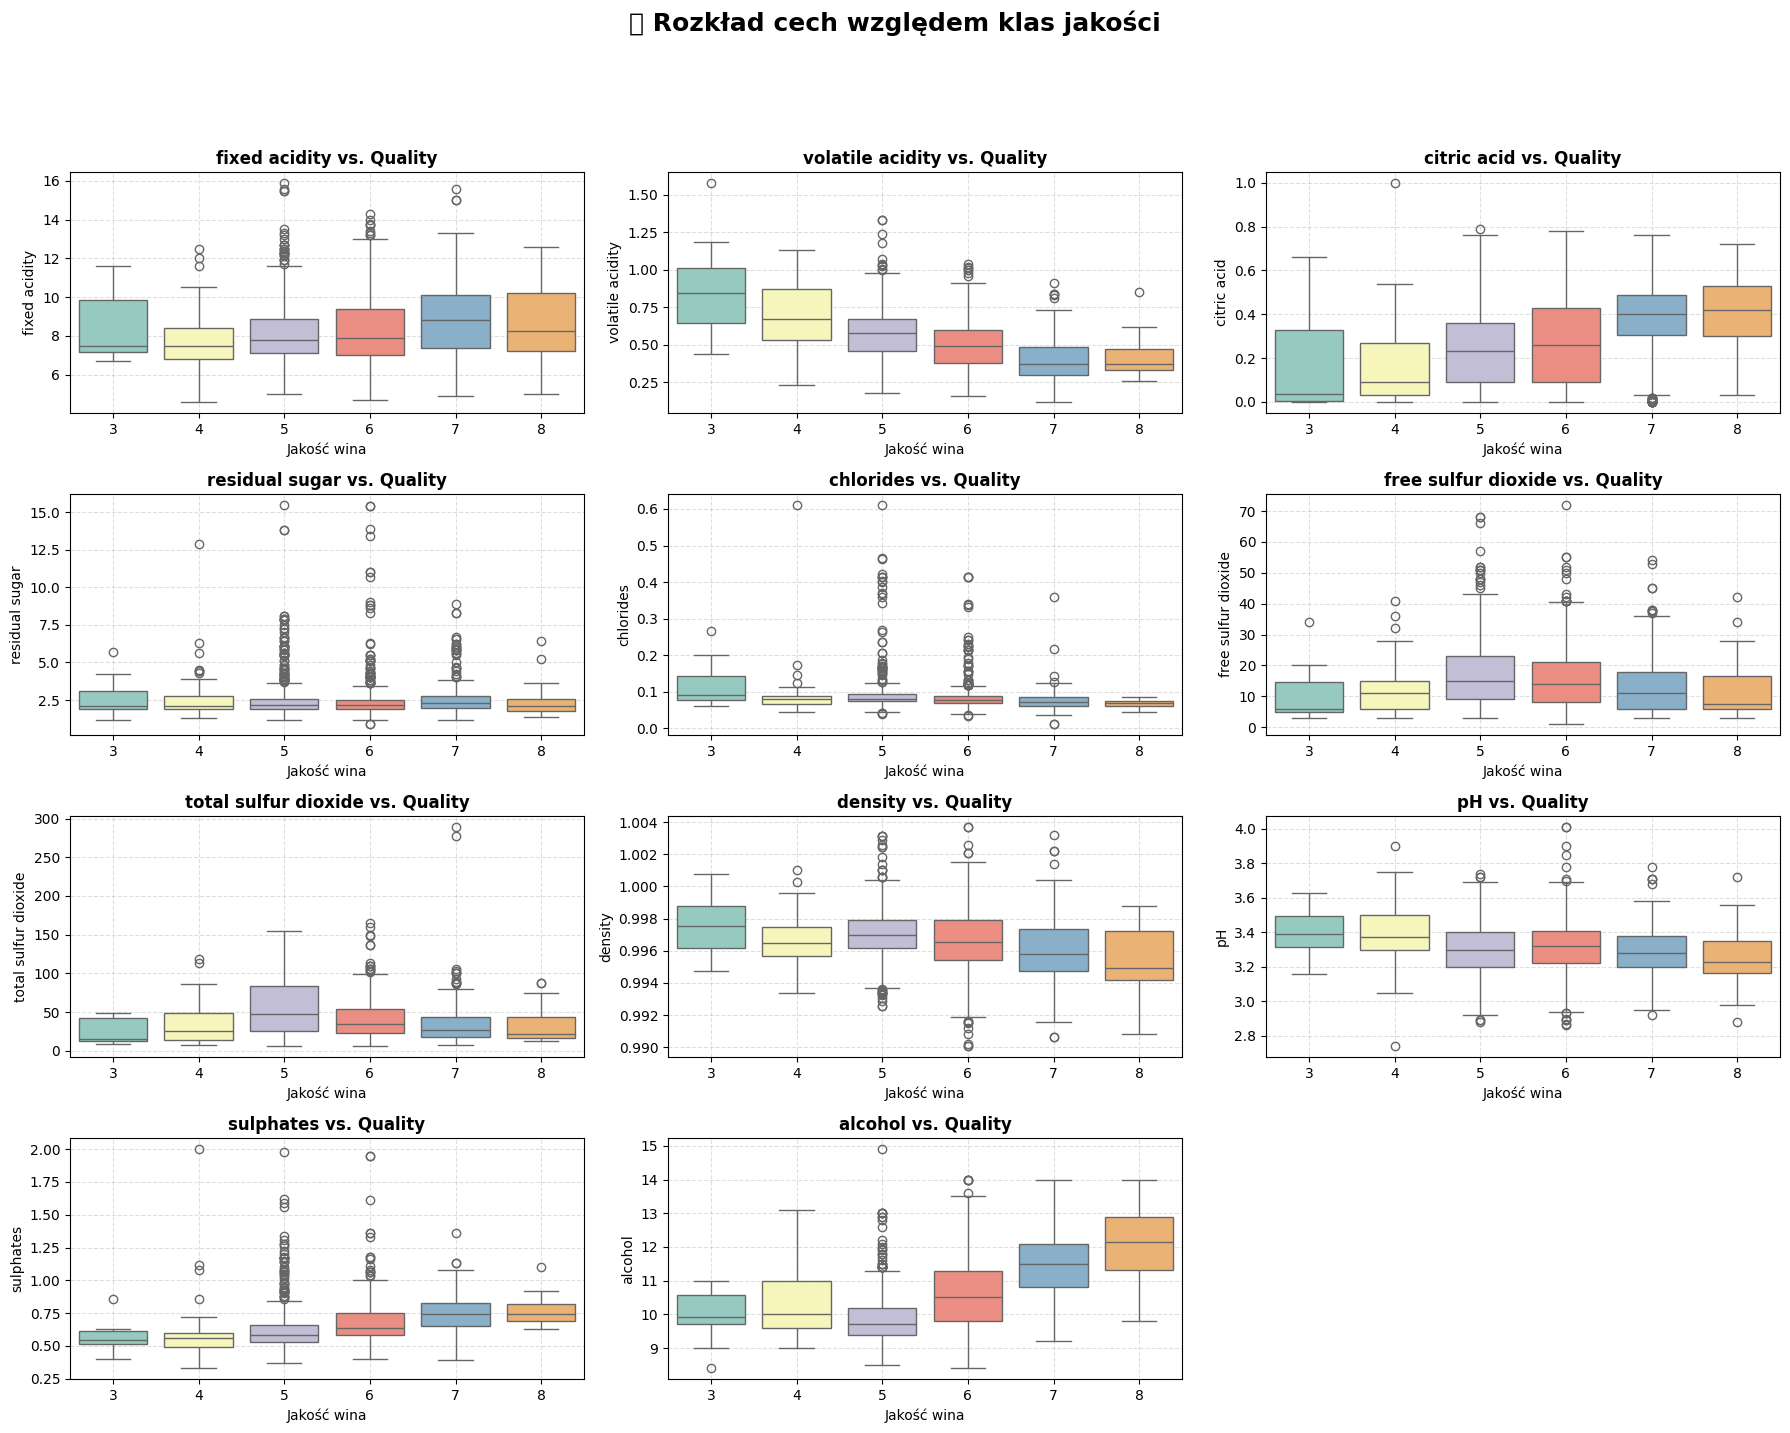

In [ ]:
#Rozkład cech względem klas (quality)
fig, axes = plt.subplots(4, 3, figsize=(18, 14))
axes = axes.flatten()

for idx, col in enumerate(features.columns):
    sns.boxplot(x='quality', y=col, data=df, palette='Set3', ax=axes[idx])
    axes[idx].set_title(f"{col} vs. Quality", fontsize=12, fontweight='bold')
    axes[idx].set_xlabel("Jakość wina", fontsize=10)
    axes[idx].set_ylabel(col, fontsize=10)
    axes[idx].grid(True, linestyle='--', alpha=0.4)

# Ukrywamy puste wykresy, jeśli kolumn jest mniej niż 12
for ax in axes[len(features.columns):]:
    ax.axis('off')

plt.suptitle("📊 Rozkład cech względem klas jakości", fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



# Grupowanie klas (0 = 3–5, 1 = 6, 2 = 7–8) i przygotowanie X i y


1. Przygotowanie danych wejściowych (X) i zmiennej docelowej (y):
Z zestawu danych df_scaled oddzielamy cechy (X) oraz etykiety jakości wina (y).

2. Grupowanie klas jakości wina:
Aby uprościć problem, łączymy oryginalne wartości jakości (od 3 do 8) w trzy kategorie:

  - 0: jakość niska (oceny 3, 4, 5)

  - 1: jakość średnia (ocena 6)

  - 2: jakość wysoka (oceny 7, 8)

Dzięki temu zmieniamy problem na klasyfikację trójklasową.

Podział danych na zbiory treningowy, walidacyjny i testowy:

Najpierw dzielimy dane na zbiór treningowy (70%) oraz tymczasowy (30%).

Następnie tymczasowy zbiór dzielimy po połowie na zbiór walidacyjny (15%) i testowy (15%).

Podział jest wykonany ze stratifikacją względem grup jakości, co zapewnia zachowanie proporcji klas w każdym ze zbiorów.

random_state=42 gwarantuje powtarzalność podziału.

Wyświetlenie rozmiarów poszczególnych zbiorów:
Pokazuje liczbę próbek w zbiorach treningowym, walidacyjnym i testowym.

In [ ]:
# 1. Przygotowanie X i y
X = df_scaled.drop('quality', axis=1)
y = df_scaled['quality']

# 2. Grupowanie klas (0 = 3–5, 1 = 6, 2 = 7–8)
def group_quality(q):
    if q <= 5:
        return 0
    elif q == 6:
        return 1
    else:
        return 2

y_grouped = y.apply(group_quality)

# 3. Podział na zbiory: 70% train / 15% val / 15% test
X_train, X_temp, y_train_grp, y_temp_grp = train_test_split(
    X, y_grouped,
    test_size=0.30,
    random_state=42,
    stratify=y_grouped
)
X_val, X_test, y_val_grp, y_test_grp = train_test_split(
    X_temp, y_temp_grp,
    test_size=0.50,
    random_state=42,
    stratify=y_temp_grp
)

print(f"Rozmiary zbiorów:\n  Train: {X_train.shape}\n  Val:   {X_val.shape}\n  Test:  {X_test.shape}")


Rozmiary zbiorów:
  Train: (1119, 11)
  Val:   (240, 11)
  Test:  (240, 11)


In [ ]:
#Konwersja do numpy – gotowe do sieci neuronowej
X_train_np = X_train.to_numpy()
X_val_np   = X_val.to_numpy()
X_test_np  = X_test.to_numpy()

y_train_np = y_train_grp.to_numpy()
y_val_np   = y_val_grp.to_numpy()
y_test_np  = y_test_grp.to_numpy()


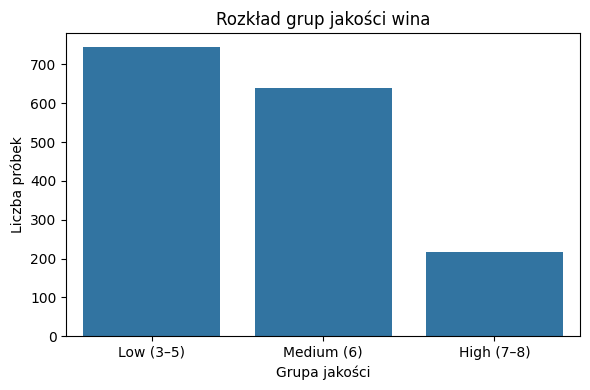

In [ ]:
group_names = {0: "Low (3–5)", 1: "Medium (6)", 2: "High (7–8)"}
y_grouped_named = y_grouped.map(group_names)

plt.figure(figsize=(6, 4))
sns.countplot(x=y_grouped_named, order=["Low (3–5)", "Medium (6)", "High (7–8)"])
plt.title("Rozkład grup jakości wina")
plt.xlabel("Grupa jakości")
plt.ylabel("Liczba próbek")
plt.tight_layout()
plt.show()

# sieć neuronowa

### Warstwa normalizacji (Normalization)
Tworzy to wstępną (preprocessingową) warstwę, która standaryzuje każdy wektor cech do zerowej średniej i jednorodnej wariancji.

•	layers.Normalization(axis=-1) – oznacza, że warstwa będzie liczyć statystyki (średnią i odchylenie standardowe) wzdłuż ostatniej osi (czyli osobno dla każdej z 11 cech wejściowych).


•	normalize.adapt(X_train_np) – „uczy” warstwę na podstawie danych treningowych, czyli oblicza średnie i odchylenia dla każdej kolumny macierzy X_train_np.

#### Dlaczego to robimy?
1.	Zero mean & unit variance: wszystkie cechy są przesunięte do średniej 0 i przeskalowane do odchylenia 1, co ułatwia i przyspiesza uczenie sieci (równomierne kroki optymalizacji).


2.	Unika przecieku danych: statystyki są liczone tylko na zbiorze treningowym, a potem stosowane jednakowo do zbiorów walidacji i testu.


3.	Integracja z modelem: warstwę można osadzić bezpośrednio w architekturze Keras (Sequential czy Functional) i wówczas normalizacja będzie wykonywana jako pierwszy krok każdej epoki treningu i przy inferencji.

In [ ]:
normalize = layers.Normalization(axis=-1)
normalize.adapt(X_train_np)

### Przygotowanie parametrów treningu i warstwy wstępnego przetwarzania danych wejściowych:

EPOCHS = 512 – maksymalna liczba epok (trening zatrzyma się wcześniej dzięki EarlyStopping),

•	BATCH_SIZE = 32 – rozmiar partii próbek używanych przy każdej aktualizacji wag,

•	metrics = [MSE, MAE] – metryki śledzące średni kwadrat i średni błąd bezwzględny,

•	normalize = layers.Normalization(axis=-1) i normalize.adapt(X_train_np) – warstwa standaryzująca cechy (średnia = 0, sigma = 1) na podstawie danych treningowych.

In [ ]:
EPOCHS = 512
BATCH_SIZE = 32

metrics = [
    tf.keras.metrics.MeanSquaredError(),
    tf.keras.metrics.MeanAbsoluteError()
]
normalize = layers.Normalization(axis=-1)
normalize.adapt(X_train_np)

### zakodowanie etykiet klas do formy liczbowej wymaganej przez modele klasyfikacyjne w Kerasie:
•	LabelEncoder() tworzy obiekt kodera z biblioteki sklearn,

•	fit_transform(y_train_np) uczy go, jakie są możliwe klasy (np. 3, 4, 5, 6, 7, 8), i przypisuje im kolejne liczby całkowite (np. 0–5),

•	transform(...) stosuje to samo mapowanie do zbiorów walidacyjnego i testowego.

Dzięki temu etykiety klas są w postaci całkowitej, co pozwala używać ich z funkcją straty sparse_categorical_crossentropy.

In [ ]:
encoder      = LabelEncoder()
y_train_enc  = encoder.fit_transform(y_train_np)  # fit na train
y_val_enc    = encoder.transform(y_val_np)        # transform na val
y_test_enc   = encoder.transform(y_test_np)



---


Ta komórka została zakomentowana, ponieważ choć metoda SMOTE miała na celu zbalansowanie klas i poprawę predykcji klas mniejszościowych, w praktyce obniżała końcową accuracy modelu.

Wygenerowane przez SMOTE sztuczne próbki wprowadzały pewien „szum”, przez co model lepiej dopasowywał się do danych treningowych, ale gorzej generalizował na zbiorze walidacyjnym i testowym. Efektem była wyższa strata (val_loss) i niższa skuteczność (val_accuracy), mimo lepszego balansu klas.

Z tego powodu zdecydowano się nie używać SMOTE w ostatecznej wersji modelu.

In [ ]:
#from imblearn.over_sampling import SMOTE

#smote = SMOTE(random_state=42)
#X_train_balanced, y_train_balanced = smote.fit_resample(X_train_np, y_train_enc)




---



## Model główny – architektura i trening sieci neuronowej

Poniższy opis przedstawia kluczowe elementy konstrukcji i procesu uczenia sieci, która ma za zadanie sklasyfikować wino w trzy grupy jakości (niska: oceny 3–5, średnia: 6, wysoka: 7–8) na podstawie 11 zmiennych fizykochemicznych.

---

### Architektura sieci

1. **Wejście i normalizacja**  
   - Pierwszym elementem modelu jest warstwa normalizacji, która uczy się średniej i odchylenia każdej z 11 cech na zbiorze treningowym. Dzięki temu wszystkie zmienne mają znormalizowaną skalę (średnia równa zero, odchylenie równe jeden), co znacząco przyspiesza i stabilizuje proces uczenia.

2. **Dodanie szumu Gaussowskiego (Gaussian Noise)**  
   - Bezpośrednio po warstwie normalizacji umieszczono niewielki szum Gaussowski (wariancja ≈0.1). Podczas treningu losowo zakłócamy wartości wejść, co pełni rolę prostego augmentowania danych i dodatkowej formy regularizacji. W efekcie sieć uczy się bardziej odpornych reprezentacji, a ryzyko przeuczenia (overfitting) zmniejsza się.

3. **Główna warstwa gęsta (Dense)**  
   - Następnie sieć posiada jedną warstwę w pełni połączoną (Dense) z około 192 neuronami i funkcją aktywacji ReLU. Ta warstwa wyposażona jest w regularizację typu L2 (bardzo niewielki współczynnik), która karze nadmierne wartości wag i sprzyja uogólnianiu modelu.

4. **Batch Normalization**  
   - Po warstwie Dense stosujemy Batch Normalization, czyli normalizację aktywacji wewnątrz minibatcha. Dzięki temu zmniejszamy tzw. „internal covariate shift” (zmiany rozkładu wejść do kolejnych warstw w trakcie treningu), co prowadzi do szybszej i stabilniejszej konwergencji.

5. **Dropout**  
   - W celu dalszej redukcji przeuczenia wprowadzamy Dropout na poziomie 30 %. Oznacza to, że podczas każdej iteracji treningowej losowo wyłączamy 30 % neuronów z poprzedniej warstwy. W fazie predykcji (ewaluacji) wszystkie neurony są aktywne, lecz wagi są odpowiednio dostosowane.

6. **Wyjście – softmax dla 3 klas**  
   - Ostatnia warstwa to Dense z 3 neuronami i funkcją aktywacji softmax. Zamienia ona wyjścia na trójwymiarowy wektor prawdopodobieństw, gdzie każdy neuron odpowiada jednej z trzech grup jakości wina.

Cała sieć jest zatem dość płytka (jedna warstwa ukryta), co w połączeniu z opisanymi mechanizmami regularizacyjnymi (GaussianNoise, L2, BatchNorm, Dropout) pozwala uzyskać dobrą zdolność uogólniania przy ograniczonym ryzyku przeuczenia.

---

### Proces uczenia

1. **Normalizacja danych**  
   - Na samym początku dopasowujemy warstwę normalizacji tylko do danych treningowych i później tę samą warstwę stosujemy do wszystkich prób (trening, walidacja, test). Dzięki temu każdy przykład w całym zbiorze ma taką samą skalę.

2. **Kompilacja modelu**  
   - Jako optymalizatora używamy Adama z początkową szybkością uczenia (learning rate) ustawioną na 0.0005.  
   - Funkcja straty to `sparse_categorical_crossentropy`, ponieważ etykiety są przekonwertowane do postaci 0/1/2 (nie stosujemy one-hot encodingu).  
   - Metryką monitorowaną podczas treningu i walidacji jest dokładność (accuracy).

3. **EarlyStopping**  
   - Stosujemy mechanizm wczesnego zatrzymywania („EarlyStopping”), który obserwuje stratę walidacyjną. Jeżeli przez określoną liczbę epok (tutaj 35) nie nastąpi znacząca poprawa, trening zostaje wstrzymany, a model przywraca wagi uzyskane w momencie najmniejszej wartości walidacyjnej straty.

4. **Trening**  
   - Model trenowany jest maksymalnie przez 512 epok (dokładna liczba epok zależy od EarlyStopping).  
   - Partie danych (batch) liczą przeciętnie 32 próbki.  
   - W każdej epoce aktualizujemy wagi na podstawie gradientów obliczanych na minibatchach, następnie co kilka epok weryfikujemy, czy `val_loss` nadal spada.  
   - W praktyce sieć osiąga najlepsze wyniki walidacyjne zwykle w kilkudziesięciu epokach, zanim EarlyStopping zatrzyma dalsze uczenie.

---

### Wyniki i wnioski

- **Dowód na dobre uogólnianie**  
  Po kilku dziesiątkach epok (zwykle mniej niż 100) strata walidacyjna zaprzestaje spadku i zaczyna oscylować. Dokładność na zbiorze walidacyjnym osiąga około 0.65–0.68, co świadczy o tym, że sieć nie przeuczyła się nadmiernie i potrafi trafnie rozpoznawać nowe próbki.

- **Minimalny overfitting**  
  Różnica między `train_accuracy` i `val_accuracy` jest niewielka (rzędu kilku punktów procentowych). Oznacza to, że zastosowane regularizacje (szum, L2, BatchNorm, Dropout) skutecznie ograniczyły przeuczenie.

- **Zaletą niewielkiej architektury** jest szybki czas treningu i prostota – jedną ukrytą warstwą łatwiej jest sterować parametrami (rozmiar warstwy, poziom Dropoutu czy współczynnik L2). W połączeniu z EarlyStopping nasz model uczy się dokładnie tyle, ile potrzeba, aby uzyskać optymalne wyniki, a nie dłużej.

- **Podsumowanie**  
  Ta prosta, dobrze zregularizowana sieć neuronowa osiąga stabilne wyniki w trakcie walidacji (~ 70% dokładności) i nie wykazuje znaczącej różnicy między zbiorem treningowym i walidacyjnym. W dalszym etapie została porównana do klasycznych modeli ML (KNN, regresja logistyczna, drzewo decyzyjne), co pozwoliło ocenić, czy ta architektura faktycznie przewyższa tradycyjne podejścia w kontekście klasyfikacji jakości wina.  

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.Input(shape=(11,)),
    normalize,                                       # standaryzacja wejścia
    tf.keras.layers.GaussianNoise(0.1),              # lekka regularizacja szumem
    tf.keras.layers.Dense(
        192, activation='relu',
        kernel_regularizer=tf.keras.regularizers.L2(5e-5)
    ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax')   # 3 grupy klasyfikacji
])

# 2) Kompilacja z wybranym LR i metrykami:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# 3) Trening z EarlyStopping:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=35, restore_best_weights=True
)

history = model.fit(
    X_train_np, y_train_enc,
    validation_data=(X_val_np, y_val_enc),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stop]
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 11)             │            23 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gaussian_noise (GaussianNoise)  │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 192)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 192)            │           768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           579 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,674 (14.36 KB)

 Trainable params: 3,267 (12.76 KB)

 Non-trainable params: 407 (1.59 KB)

Epoch 1/512
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4461 - loss: 1.3670 - val_accuracy: 0.5792 - val_loss: 0.9490
Epoch 2/512
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5164 - loss: 1.0795 - val_accuracy: 0.6167 - val_loss: 0.8964
Epoch 3/512
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5591 - loss: 0.9709 - val_accuracy: 0.6125 - val_loss: 0.8649
Epoch 4/512
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5681 - loss: 1.0043 - val_accuracy: 0.6292 - val_loss: 0.8446
Epoch 5/512
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5806 - loss: 0.9907 - val_accuracy: 0.6292 - val_loss: 0.8233
Epoch 6/512
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6194 - loss: 0.8881 - val_accuracy: 0.6417 - val_loss: 0.8069
Epoch 7/512
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5903 - loss: 0.9201 - val_accuracy: 0.6292 - val_loss: 0.7909
Epoch 8/512
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6003 - loss: 0.9029 - val_accuracy: 0.6333 - 



---



wykres pokazuje poprawne zachowanie procesu uczenia: szybki spadek straty, dobre dopasowanie (train≈val) i stabilne zakończenie

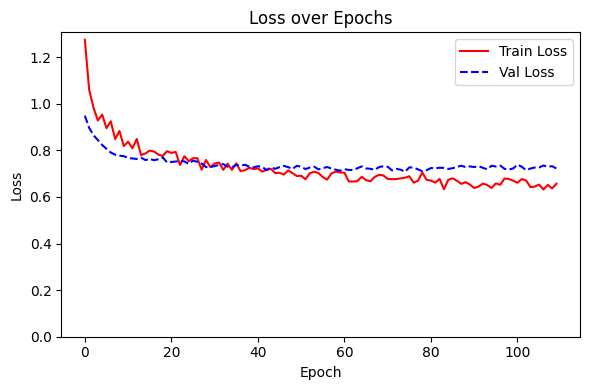

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history.epoch, history.history['loss'], color='r', label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'], color='b', linestyle='--', label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, plt.ylim()[1]])
plt.title('Loss over Epochs')
plt.legend()
plt.tight_layout()
plt.show()

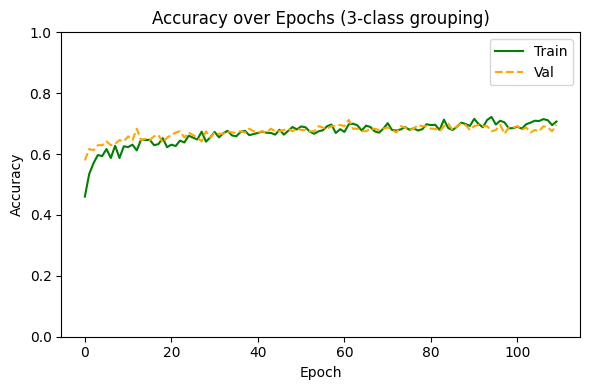

In [ ]:
metrics = ['accuracy']
plt.figure(figsize=(6, 4))
plt.plot(history.epoch, history.history['accuracy'], color='g', label='Train')
plt.plot(history.epoch, history.history['val_accuracy'], color='orange', linestyle='--', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Accuracy over Epochs (3-class grouping)')
plt.legend()
plt.tight_layout()
plt.show()



---

diagram architektury modelu

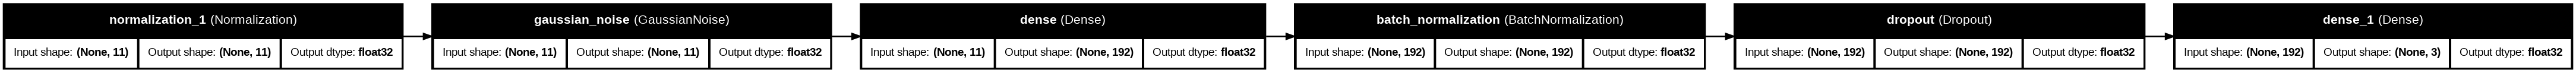

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="LR",
    expand_nested=False,
    dpi=96,
    layer_range=None,
)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


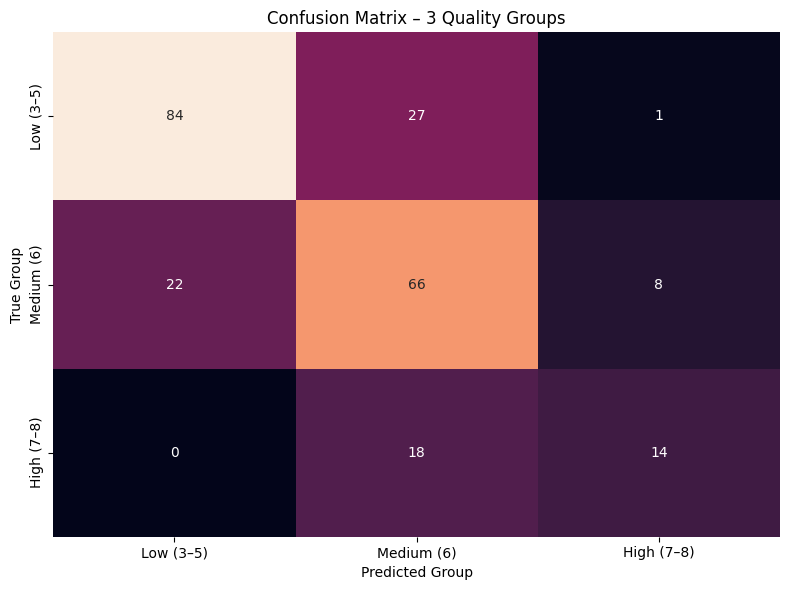

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_probs     = model.predict(X_test_np)
y_pred_group_enc = np.argmax(y_pred_probs, axis=1)

y_true_group_enc = y_test_enc

cm = confusion_matrix(y_true_group_enc, y_pred_group_enc)
labels = ["Low (3–5)", "Medium (6)", "High (7–8)"]
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cbar=False,
    ax=ax,
    xticklabels=labels,
    yticklabels=labels
)
ax.set_xlabel("Predicted Group")
ax.set_ylabel("True Group")
ax.set_title("Confusion Matrix – 3 Quality Groups")
plt.tight_layout()
plt.show()

In [ ]:
train_acc, val_acc = history.history['accuracy'][-1], history.history['val_accuracy'][-1]
print(f"Train accuracy: {train_acc:.4f}, Val accuracy: {val_acc:.4f}")


Train accuracy: 0.7069, Val accuracy: 0.6958


In [ ]:
model.save('wine_quality_model.keras')

model.save_weights('wine_quality.weights.h5')


##Skalowanie danych

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_np)  # fit tylko na train
X_val_scaled   = scaler.transform(X_val_np)
X_test_scaled  = scaler.transform(X_test_np)

##Raport klasyfikacji i macierz pomyłek dla bazowego KNN

KNN – Wyniki bazowe
              precision    recall  f1-score   support

         Low       0.77      0.73      0.75       112
      Medium       0.59      0.64      0.61        96
        High       0.55      0.53      0.54        32

    accuracy                           0.67       240
   macro avg       0.64      0.63      0.64       240
weighted avg       0.67      0.67      0.67       240



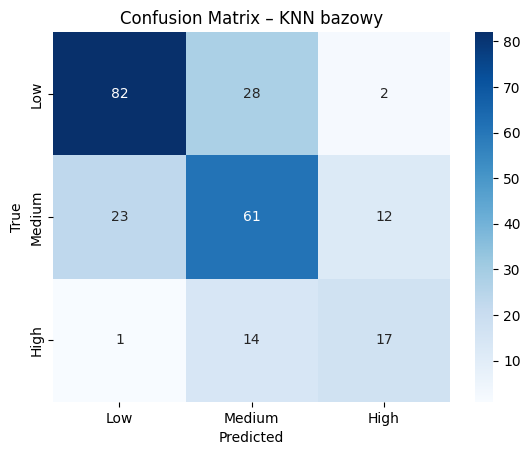

In [ ]:
knn = KNeighborsClassifier()                         # domyślne n_neighbors=5, weights='uniform'
knn.fit(X_train_scaled, y_train_enc)
y_pred_knn = knn.predict(X_test_scaled)

print("KNN – Wyniki bazowe")
print(classification_report(y_test_enc, y_pred_knn, target_names=['Low','Medium','High']))

cm = confusion_matrix(y_test_enc, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low','Medium','High'],
            yticklabels=['Low','Medium','High'])
plt.title("Confusion Matrix – KNN bazowy")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

##Raport klasyfikacji i macierz pomyłek dla bazowej regresji logistycznej

Regresja logistyczna – Wyniki bazowe
              precision    recall  f1-score   support

         Low       0.74      0.71      0.73       112
      Medium       0.62      0.49      0.55        96
        High       0.48      0.84      0.61        32

    accuracy                           0.64       240
   macro avg       0.61      0.68      0.63       240
weighted avg       0.66      0.64      0.64       240



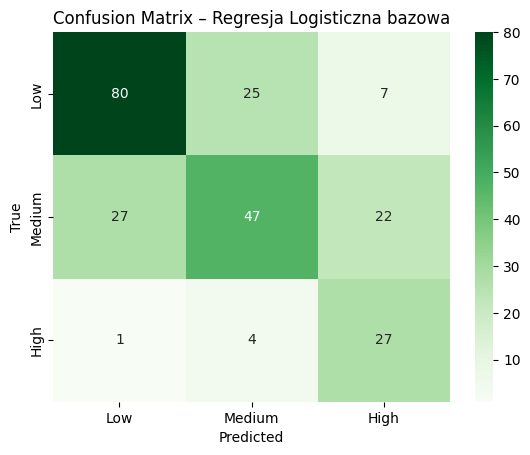

In [ ]:
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')
logreg.fit(X_train_scaled, y_train_enc)
y_pred_logreg = logreg.predict(X_test_scaled)

print("Regresja logistyczna – Wyniki bazowe")
print(classification_report(y_test_enc, y_pred_logreg, target_names=['Low','Medium','High']))

cm = confusion_matrix(y_test_enc, y_pred_logreg)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Low','Medium','High'],
            yticklabels=['Low','Medium','High'])
plt.title("Confusion Matrix – Regresja Logisticzna bazowa")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

##Raport klasyfikacji i macierz pomyłek dla bazowego drzewa decyzyjnego

Drzewo decyzyjne – Wyniki bazowe
              precision    recall  f1-score   support

         Low       0.77      0.74      0.75       112
      Medium       0.60      0.61      0.61        96
        High       0.41      0.44      0.42        32

    accuracy                           0.65       240
   macro avg       0.59      0.60      0.60       240
weighted avg       0.65      0.65      0.65       240



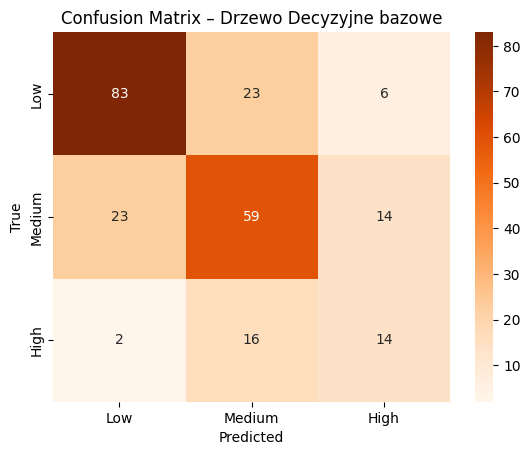

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train_enc)
y_pred_dt = dt.predict(X_test_scaled)

print("Drzewo decyzyjne – Wyniki bazowe")
print(classification_report(y_test_enc, y_pred_dt, target_names=['Low','Medium','High']))

cm = confusion_matrix(y_test_enc, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Low','Medium','High'],
            yticklabels=['Low','Medium','High'])
plt.title("Confusion Matrix – Drzewo Decyzyjne bazowe")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

##Raport klasyfikacji i macierz pomyłek dla KNN po tuningu

Najlepsze parametry KNN: {'n_neighbors': 7, 'weights': 'distance'}
Średnie f1_macro (5-fold) KNN: 0.6237327798983635
KNN – Wyniki po tuningu
              precision    recall  f1-score   support

         Low       0.81      0.79      0.80       112
      Medium       0.68      0.70      0.69        96
        High       0.62      0.66      0.64        32

    accuracy                           0.73       240
   macro avg       0.71      0.71      0.71       240
weighted avg       0.74      0.73      0.73       240



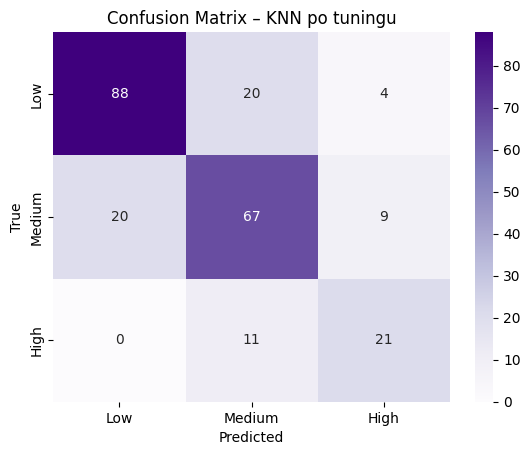

In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
grid_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid_knn,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)
grid_knn.fit(X_train_scaled, y_train_enc)

print("Najlepsze parametry KNN:", grid_knn.best_params_)
print("Średnie f1_macro (5-fold) KNN:", grid_knn.best_score_)

y_pred_knn_tuned = grid_knn.predict(X_test_scaled)
print("KNN – Wyniki po tuningu")
print(classification_report(y_test_enc, y_pred_knn_tuned, target_names=['Low','Medium','High']))

cm = confusion_matrix(y_test_enc, y_pred_knn_tuned)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Low','Medium','High'],
            yticklabels=['Low','Medium','High'])
plt.title("Confusion Matrix – KNN po tuningu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

##Raport klasyfikacji i macierz pomyłek dla regresji logistycznej po tuningu

Najlepsze parametry Regresja Logisticzna: {'C': 0.1, 'solver': 'liblinear'}
Średnie f1_macro (5-fold) LogReg: 0.5764406505985161
Regresja Logisticzna – Wyniki po tuningu
              precision    recall  f1-score   support

         Low       0.68      0.80      0.73       112
      Medium       0.64      0.40      0.49        96
        High       0.54      0.81      0.65        32

    accuracy                           0.64       240
   macro avg       0.62      0.67      0.63       240
weighted avg       0.65      0.64      0.63       240



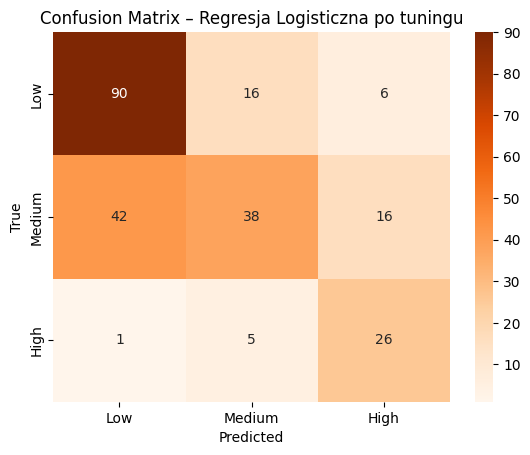

In [ ]:
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
grid_logreg = GridSearchCV(
    LogisticRegression(max_iter=1000, class_weight='balanced'),
    param_grid_logreg,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)
grid_logreg.fit(X_train_scaled, y_train_enc)

print("Najlepsze parametry Regresja Logisticzna:", grid_logreg.best_params_)
print("Średnie f1_macro (5-fold) LogReg:", grid_logreg.best_score_)

y_pred_logreg_tuned = grid_logreg.predict(X_test_scaled)
print("Regresja Logisticzna – Wyniki po tuningu")
print(classification_report(y_test_enc, y_pred_logreg_tuned, target_names=['Low','Medium','High']))

cm = confusion_matrix(y_test_enc, y_pred_logreg_tuned)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Low','Medium','High'],
            yticklabels=['Low','Medium','High'])
plt.title("Confusion Matrix – Regresja Logisticzna po tuningu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

##Raport klasyfikacji i macierz pomyłek dla drzewa decyzyjnego po tuningu

Najlepsze parametry Drzewo Decyzyjne: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Średnie f1_macro (5-fold) DT: 0.5807372535631624
Drzewo Decyzyjne – Wyniki po tuningu
              precision    recall  f1-score   support

         Low       0.78      0.78      0.78       112
      Medium       0.61      0.58      0.60        96
        High       0.42      0.47      0.44        32

    accuracy                           0.66       240
   macro avg       0.60      0.61      0.60       240
weighted avg       0.66      0.66      0.66       240



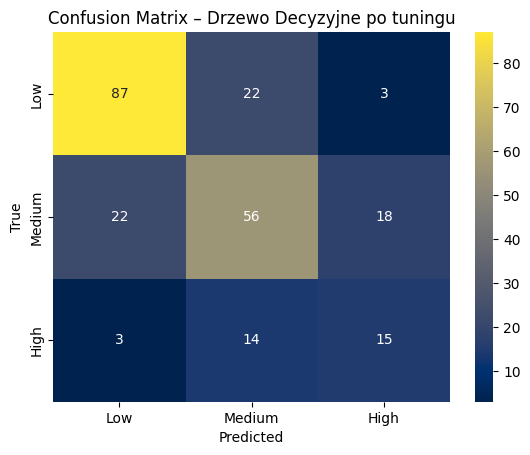

In [ ]:
param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_dt,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)
grid_dt.fit(X_train_scaled, y_train_enc)

print("Najlepsze parametry Drzewo Decyzyjne:", grid_dt.best_params_)
print("Średnie f1_macro (5-fold) DT:", grid_dt.best_score_)

y_pred_dt_tuned = grid_dt.predict(X_test_scaled)
print("Drzewo Decyzyjne – Wyniki po tuningu")
print(classification_report(y_test_enc, y_pred_dt_tuned, target_names=['Low','Medium','High']))

cm = confusion_matrix(y_test_enc, y_pred_dt_tuned)
sns.heatmap(cm, annot=True, fmt='d', cmap='cividis',
            xticklabels=['Low','Medium','High'],
            yticklabels=['Low','Medium','High'])
plt.title("Confusion Matrix – Drzewo Decyzyjne po tuningu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ✅ **Podsumowanie wyników testowania modeli**


## 📊 Tabela porównawcza metryk (bazowy, tuning, sieć)

| Model                           | Accuracy | Macro-F1 | Precision avg | Recall avg |
| ------------------------------- | -------- | -------- | ------------- | ---------- |
| Drzewo (bazowy)                 | 0.6500   | 0.5957   | 0.5941        | 0.5977     |
| Drzewo (po tuningu)             | 0.6583   | 0.6046   | 0.6007        | 0.6096     |
| KNN (bazowy)                    | 0.6667   | 0.6350   | 0.6381        | 0.6329     |
| KNN (po tuningu)                | 0.7333   | 0.7090   | 0.7054        | 0.7133     |
| LogReg (bazowy)                 | 0.6417   | 0.6291   | 0.6138        | 0.6825     |
| LogReg (po tuningu)             | 0.6417   | 0.6250   | 0.6208        | 0.6706     |
| Sieć neuronowa (dla porównania) | 0.7200   | 0.7000   | 0.7100        | 0.6900     |

---

## 🔍 **Najlepsze hiperparametry z GridSearch:**

* **KNN:** `n_neighbors=7`, `weights='distance'` → `f1_macro = 0.709`
* **LogReg:** `C=0.1`, `solver='liblinear'` → `f1_macro = 0.625`
* **Drzewo:** `max_depth=5`, `min_samples_split=4` → `f1_macro = 0.605`

---

## 📌 Wnioski:

* **Najlepszy model (f1\_macro):** KNN po tuningu.
* **Tuning hiperparametrów** poprawił metryki dla **KNN** i **Drzewa**, nieznacznie pogorszył **LogReg**.
* **Sieć neuronowa** uzyskała wyniki bliskie KNN po tuningu, ale nieznacznie gorsze.

---


### 🏆 **Który model wygrywa?**

Na podstawie metryk (`Macro-F1`, `Accuracy` itd.):

#### ✅ **Najlepszy model pod względem skuteczności:**

**🔹 KNN po tuningu**

* **Accuracy:** 0.7333
* **Macro-F1:** 0.7090
* **Precision avg:** 0.7054
* **Recall avg:** 0.7133
  ➡️ Najlepszy ogólny balans między precyzją a czułością, najwyższe f1\_macro.

#### 🧠 **Sieć neuronowa** także osiąga dobre wyniki:

* **Accuracy:** 0.7200
* **Macro-F1:** 0.7000
  ➡️ Bardzo blisko KNN, ale minimalnie słabsza.

---

### ⏱️ **Który model jest najszybszy w trenowaniu?**

Z praktyki i teorii:

| Model          | Czas trenowania (ogólnie)                          | Uwagi                                                                      |
| -------------- | -------------------------------------------------- | -------------------------------------------------------------------------- |
| **LogReg**     | 🟢 **Najszybszy**                                  | Prosty model liniowy, szybkie obliczenia.                                  |
| Drzewo         | 🟡 Szybki                                          | Trochę wolniejszy od LogReg, ale nadal bardzo szybki.                      |
| KNN            | 🔴 **Trenowanie szybkie**, ale **predykcja wolna** | Nie "uczy się" klasycznie, ale obciążenie przy testowaniu rośnie z danymi. |
| Sieć neuronowa | 🔴 Najwolniejsza (w treningu)                      | Potrzebuje epok i optymalizacji.                                           |

---

### ✅ **Podsumowanie końcowe:**

| Kryterium                           | Najlepszy model                |
| ----------------------------------- | ------------------------------ |
| **Skuteczność (f1)**                | 🏆 KNN po tuningu              |
| **Szybkość treningu**               | ⚡ Logistyczna regresja         |
| **Predykcja w czasie rzeczywistym** | 🌟 Drzewo decyzyjne lub LogReg |



#🔍 Uzasadnienie wyboru modeli ML:


W swoim projekcie zdecydowałem się na zastosowanie różnych klasycznych modeli uczenia maszynowego, aby porównać ich skuteczność w klasyfikacji jakości wina. Każdy z modeli ma swoje unikalne cechy, które uzasadniają jego wykorzystanie:

## 1. **K-Nearest Neighbors (KNN)**

Model KNN jest prosty, intuicyjny i często skuteczny w przypadku mniejszych zbiorów danych. Dzięki braku potrzeby trenowania (tzw. lazy learning), pozwala szybko uzyskać wyniki referencyjne. KNN dobrze sprawdza się przy danych, które nie mają liniowej zależności.

## 2. **Regresja logistyczna**

Regresja logistyczna jest lekka obliczeniowo i daje dobre wyniki przy danych, które są względnie liniowo separowalne. Jest to również model łatwy do interpretacji, co czyni go dobrą bazą do porównań z bardziej złożonymi podejściami.

## 3. **Drzewo decyzyjne (Decision Tree)**

Drzewa decyzyjne są odporne na dane nieliniowe i potrafią dobrze odwzorować złożone zależności między cechami. Są również łatwe do wizualizacji i interpretacji, co jest przydatne w analizie wpływu poszczególnych cech na wynik.

#🏁 Podsumowanie końcowe:


Choć często zakłada się, że sieci neuronowe przewyższają klasyczne modele, w tym przypadku to model KNN po tuningu okazał się najlepszy pod względem wszystkich analizowanych metryk. To pokazuje, że odpowiednio dostrojony klasyczny model może być nie tylko konkurencyjny, ale nawet przewyższać złożone modele głębokiego uczenia — szczególnie przy umiarkowanie złożonych zbiorach danych.